# Import Libraries

In [285]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

### From sklearn - Preprocesing 
from sklearn import preprocessing

# Dimension reduction 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Clustering 
from sklearn.manifold import TSNE

from sklearn.metrics import multilabel_confusion_matrix

from sklearn import metrics 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

-----
# Reading files and merging features with labels

In [286]:
#dataset = pd.read_csv("Genes\data.csv")
dataset = pd.read_csv('/Users/pedrorodriguezdeledesmajimenez/1_Coding/Datasets/RUG_Pattern-recognition_Assignment-2/Task 1/Genres/data.csv')

#labels = pd.read_csv("Genes\labels.csv")
dataset_labels =pd.read_csv('/Users/pedrorodriguezdeledesmajimenez/1_Coding/Datasets/RUG_Pattern-recognition_Assignment-2/Task 1/Genres/labels.csv')

In [287]:
# Merging both datasets and removing first column
dataset = pd.merge(dataset, dataset_labels, on='Unnamed: 0').drop("Unnamed: 0", axis=1)

In [288]:
print(f'Dataset consists of {dataset.shape[0]} input sample vectors, each vector has {dataset.shape[1]} '\
      f'gene features.\nAlso the availbale classes are {len(dataset["Class"].unique())}.'\
      f' The possible choises are {", ".join(val for val in dataset.Class.unique())}.')
class_counts = dataset.Class.value_counts()
print(f'As we can see, we have class imbalance.\n\n{class_counts.to_string()}')

Dataset consists of 801 input sample vectors, each vector has 20532 gene features.
Also the availbale classes are 5. The possible choises are PRAD, LUAD, BRCA, KIRC, COAD.
As we can see, we have class imbalance.

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78


----
# Analizing data

### Visualization of the data

We will use the "T-distributed stochastic neighbor embedding algorithm" to visualize
the high-dimensional data in a 2-D space

In [289]:
m = TSNE(init = 'pca', n_components = 2, learning_rate=20)

tsne_features = m.fit_transform(dataset.drop('Class', axis=1))

In [290]:
# Here we add the 2 new coordinate for each xample

dataset.loc[:,'x'] = tsne_features[:,0]
dataset.loc[:,'y'] = tsne_features[:,1]

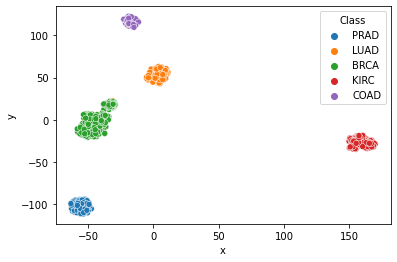

In [291]:
#Plot the xample in 2-D

sns.scatterplot(x="x", y="y", hue='Class', data=dataset)
plt.show()

In [292]:
# We remove the 2 columns with the coordinates for representing the high dimension data in 2D

dataset.drop(['x', 'y'], axis=1, inplace=True)

###  Encode the labels of the dataset

In [293]:
# Encode the labels and updaate values

le = preprocessing.LabelEncoder()

dataset["Class"] = le.fit_transform(dataset_labels.drop("Unnamed: 0", axis=1).values.ravel())

In [294]:
# Let´s store all the labels

keys = le.classes_

# And now store labels with their encoded value 

values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

### Normalize the dataset

In [295]:
# Lets store the dataset values without the columns titles
x = dataset.iloc[:, :-1].values 

In [296]:
# Let´s create an instance with the normalice function
min_max_scaler = preprocessing.MinMaxScaler()

# Let´s fit the normilice function
x_scaled = min_max_scaler.fit_transform(x)

# Let´s put in the dataframe the values scaled
dataset.iloc[:, :-1] = pd.DataFrame(x_scaled)

We used Label encoding to work with numerical values instead of categorical. Also each column has been normalized ans scaled.<br>
The labels now are: 

In [297]:
dictionary

{'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

Number of examples of each label:

In [298]:
dataset.Class.value_counts()

0    300
2    146
3    141
4    136
1     78
Name: Class, dtype: int64

# Clustering original data: KMEANS

In [299]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [300]:
X_df = dataset.drop("Class", axis=1)
X = X_df.values

<function matplotlib.pyplot.show(close=None, block=None)>

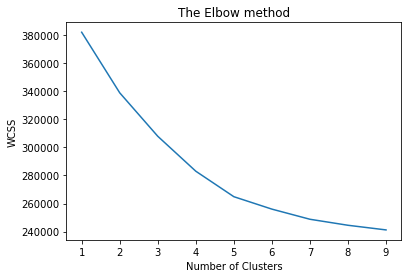

In [301]:
wcss=[]

for i in range(1,10):

    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init=10, random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show



In [302]:
# For no cluster = no categories

kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init=10, random_state=2)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=2)

In [303]:
clusters_labels_kmean = kmeans.labels_

dataset_lalels_encoded = dataset["Class"].values

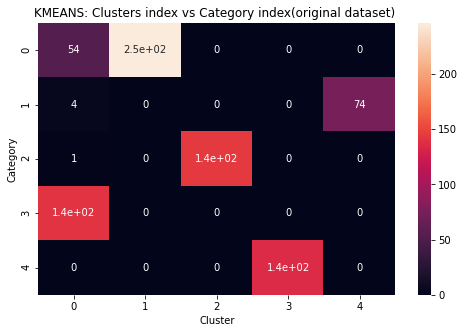

In [304]:
#Confusion matrix

plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(dataset_lalels_encoded, clusters_labels_kmean, rownames=['Category'], 
                               colnames=['Cluster'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_Kmeans.png")
plt.title('KMEANS: Clusters index vs Category index(original dataset) ')
plt.show()

### Evaluation of the clustering with Silhouette


In [306]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 3 The average silhouette_score is : 0.13152518496415064
For n_clusters = 4 The average silhouette_score is : 0.1505810569473454
For n_clusters = 5 The average silhouette_score is : 0.1706820577866715
For n_clusters = 6 The average silhouette_score is : 0.1786715931682775
For n_clusters = 7 The average silhouette_score is : 0.17399542050641434
For n_clusters = 8 The average silhouette_score is : 0.15049294756813147


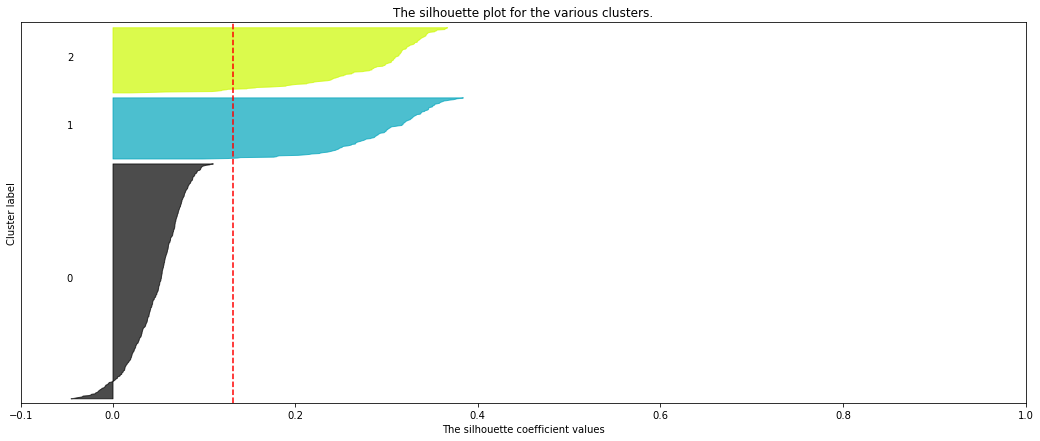

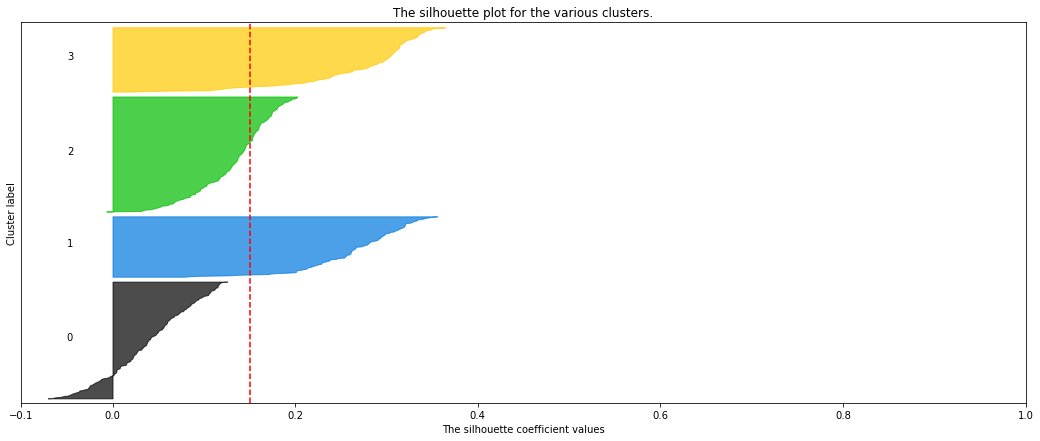

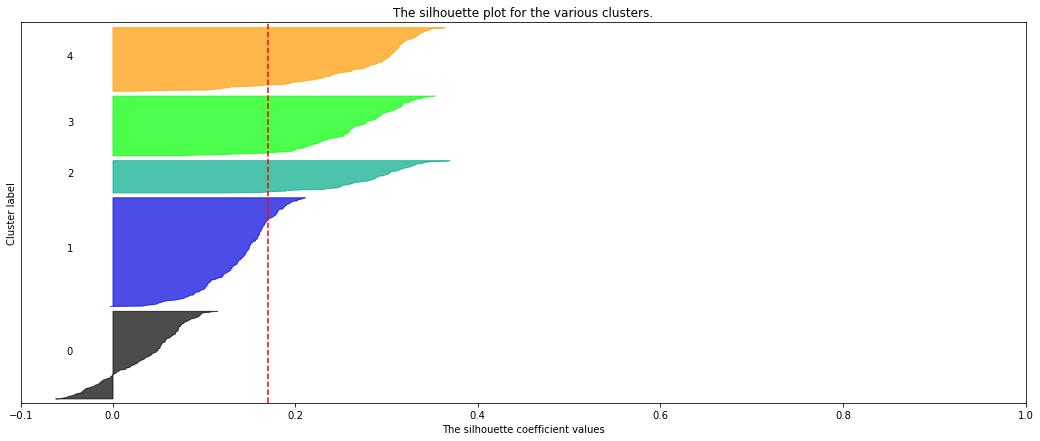

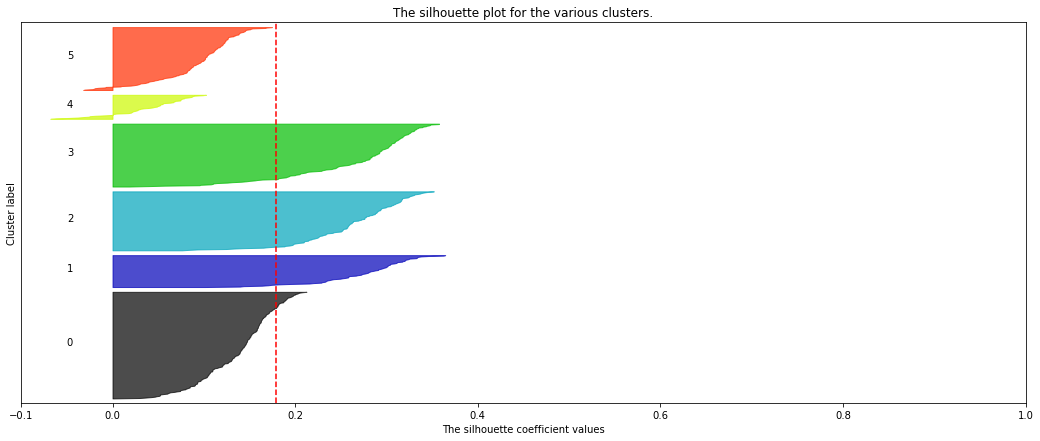

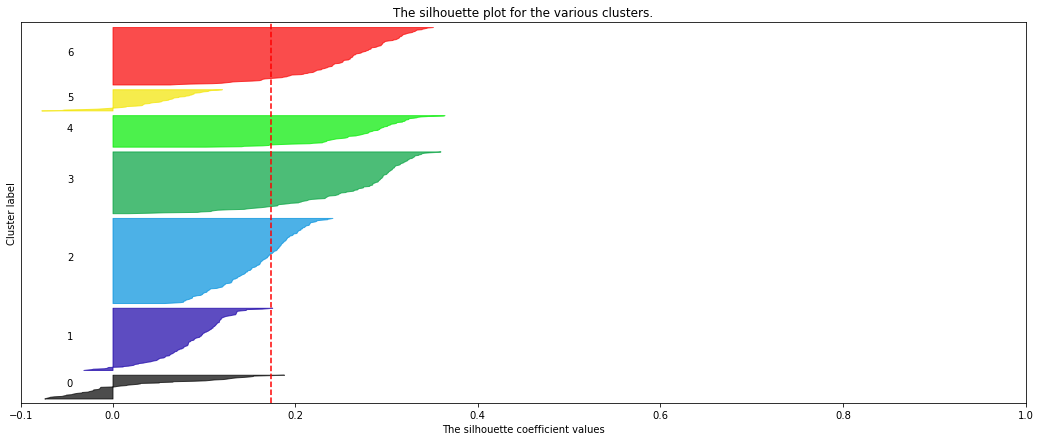

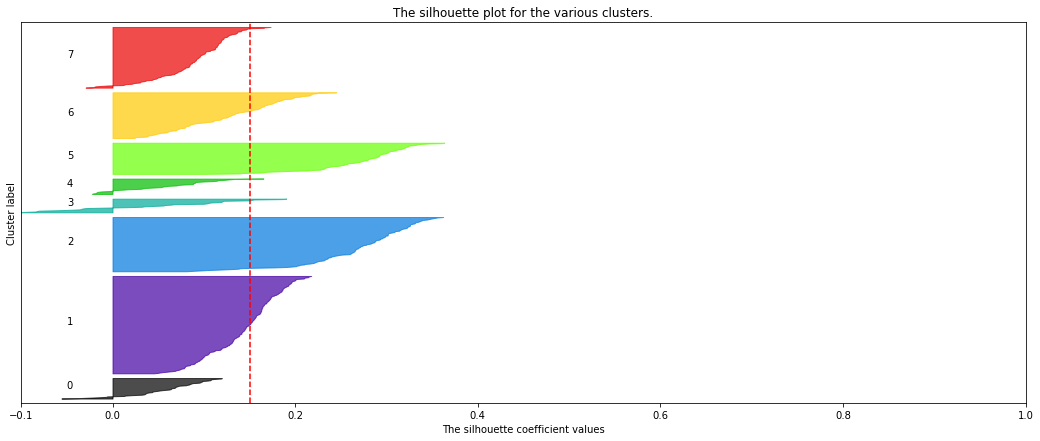

In [307]:
# Silhouete socre for different clusters 

range_n_clusters = [3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)
    
     # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
     # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_2 = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels_2)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels_2)
    
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels_2 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        
plt.show()

# Clustering original data: DBSCAN

NOT TUNED --> REALLY DIFFICULT TO TUNE

In [336]:
from sklearn.cluster import DBSCAN

min_samples = 2

In [337]:
# Let`s check the distances to try to tune the parameters 
from sklearn.neighbors import NearestNeighbors

k = min_samples if min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors=k).fit(dataset)
distance, indices = nbrs.kneighbors()
distance.shape

(801, 2)

In [338]:
# The last cell of each row represents the distance of the k´th farthes point

df = distance[:,-1]
df.sort(axis=0)

In [339]:
# Compute DBSCAN
clustering_db = DBSCAN(eps=20, min_samples=min_samples, metric = 'euclidean')
db = clustering_db.fit(dataset)

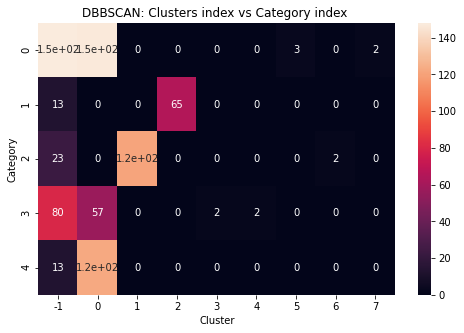

In [340]:
clusters_labels_db = db.labels_

#Confusion matrix

plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(dataset_lalels_encoded, clusters_labels_db, rownames=['Category'], 
                               colnames=['Cluster'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_Kmeans.png")
plt.title('DBBSCAN: Clusters index vs Category index ')
plt.show()

In [341]:
# Number of outliers

no_outliers = np.sum(np.array(clusters_labels_db) == -1, axis=0)
no_outliers

277

-----------
## Dimensionality reduction:  1.Principal Component Analysis

In [342]:
# Create PCA object to keep 95% of variance

pca = PCA(0.75)

# Apply PCA in input vector
pca.fit(dataset.iloc[:,:-1]) 

# Save results in an np.array
reduced = pca.transform(dataset.iloc[:,:-1])

# Save labels in an np.array
x = dataset['Class'].to_numpy()

In [343]:
# Create final dataframe with reduced dimensions
dataset_reduced_PCA = pd.DataFrame(np.column_stack((reduced, x)))

Number of features in the original dataset: 20532 <br>
After applying PCA to the dataset, we end up with:

In [344]:
dataset_reduced_PCA.shape[1]

103

In [345]:
# We are going to rename the columns name with the PCA components name

for count, column_name in enumerate(dataset_reduced_PCA.columns):
    
    if count < len(dataset_reduced_PCA.columns)-1:
        
        dataset_reduced_PCA.rename(columns={column_name : f"PCA{count+1}"}, inplace=True)
    else:
        dataset_reduced_PCA.rename(columns={column_name : "Label"}, inplace=True)

#### Lets display the explained variance of each PCA component

In [346]:
pca.explained_variance_ratio_.shape

(102,)

In [347]:
# To see the percentage of variation thaat each principal components accounts for

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
exp_var_pca = pca.explained_variance_ratio_

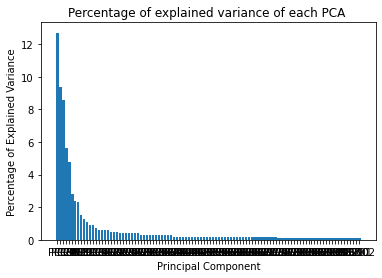

In [348]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Percentage of explained variance of each PCA ')
plt.show()

In [349]:
# Here we calculate the cumulative sum of the variance so we can plot and see how the variance of the PCA evolute 

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

In [350]:
# Let´s see the cummulative variance
cum_sum_eigenvalues[101]

0.7508083419601685

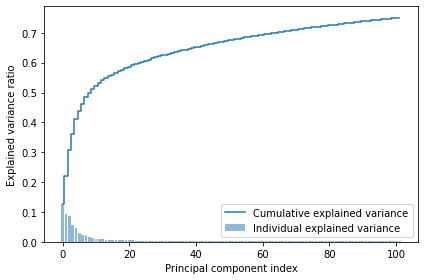

In [351]:
# Plot with regards of components

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

-----
## Dimensionality reduction:  2.Isomap Embedding

https://scikit-learn.org/stable/modules/manifold.html#isomap

Isomap Embedding is a non-linear dimensionality reduction technique that creates an embedding of the dataset and tries to preserve the relationships in the dataset.

Isomap looks for a lower-dimensional embedding which maintains distances between all points. 

In [352]:
from sklearn.manifold import Isomap

In [353]:
# Create a ISO object

iso = Isomap(n_neighbors=15, n_components=100)

In [354]:
# Apply ISO in input vector

iso.fit(dataset.iloc[:,:-1]) 

# Save results in an np.array

reduced_iso = iso.transform(dataset.iloc[:,:-1])
reduced_iso.shape

(801, 100)

In [355]:
# Save labels in an np.array

x_iso = dataset['Class'].to_numpy()

# Create final dataframe with reduced dimensions

dataset_reduced_ISO = pd.DataFrame(np.column_stack((reduced_iso, x_iso)))

Number of features in the original dataset: 20532 <br>
After applying ISO to the dataset, we end up with:

In [356]:
dataset_reduced_ISO.shape[1]

101

In [357]:
# We are going to rename the columns name with the PCA components name

for count, column_name in enumerate(dataset_reduced_ISO.columns):
    
    if count < len(dataset_reduced_ISO.columns)-1:
        
        dataset_reduced_ISO.rename(columns={column_name : f"PCA{count+1}"}, inplace=True)
    else:
        dataset_reduced_ISO.rename(columns={column_name : "Label"}, inplace=True)

dataset_reduced_ISO.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA92,PCA93,PCA94,PCA95,PCA96,PCA97,PCA98,PCA99,PCA100,Label
0,16.773842,61.210397,-10.144559,37.589817,33.117082,-0.242303,2.484123,16.529148,-1.727233,9.304151,...,-0.160680,-0.536567,-1.423092,-0.532491,0.859797,-2.899787,-0.324930,-0.390072,0.363456,4.0
1,-18.718465,-42.133974,-18.103720,15.545220,2.922765,-2.852616,18.253789,8.044454,14.885947,3.215000,...,1.141508,-4.704529,3.140771,4.138468,-1.338753,1.848299,1.164586,2.480948,-1.222961,3.0
2,36.102685,80.111598,-23.991863,10.697841,-3.735499,3.375929,-1.465461,3.895239,7.174280,-5.186992,...,0.670612,-6.382489,4.351173,2.618026,0.573259,-2.060122,-2.543019,-1.156067,1.186436,4.0
3,30.928060,66.280528,-26.604285,16.795674,-10.474135,3.463861,-3.014052,-1.123011,-7.354559,2.163773,...,-1.102389,-2.529993,2.709031,0.653521,0.703254,0.342823,-1.906929,-0.381538,0.464289,4.0
4,-24.460372,4.280758,39.336544,8.455895,-16.604956,4.850377,7.446093,9.496974,-11.894482,-18.505052,...,-0.262065,-0.928405,-0.238451,-0.811215,-2.925820,0.702235,-2.634869,-3.752262,3.080750,0.0


Outputs:

dataset_reduced_ISO

dataset_reduced_PCA

In [358]:
dataset_reduced_PCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA94,PCA95,PCA96,PCA97,PCA98,PCA99,PCA100,PCA101,PCA102,Label
0,-5.668141,-8.872139,15.853290,-6.659908,3.244882,3.529868,-0.186630,-4.599118,-0.780447,1.000318,...,-0.091763,0.377116,-0.012125,-1.028643,-0.541357,0.640421,-0.258044,0.735037,-0.348108,4.0
1,-1.470204,10.280182,-1.246634,-1.597277,-5.053639,5.329966,-3.213423,0.646405,-0.092015,-5.155488,...,0.272916,-0.660396,0.238561,-0.612262,-0.117655,0.256274,-1.781133,-0.576626,-0.847453,3.0
2,-10.845387,-1.345352,4.000770,8.010467,3.520304,6.439937,-2.008366,7.852581,-0.221889,-4.103816,...,-0.789400,-2.298390,0.443170,-0.151047,0.803538,0.055863,0.574898,0.244420,0.034691,4.0
3,-9.167961,-8.670123,5.481483,5.505311,-0.453232,4.098163,-2.687572,2.294694,-0.065617,-2.497998,...,0.040757,1.105573,-0.350252,0.418292,-1.065557,-0.098885,-0.457159,0.283911,0.846548,4.0
4,-6.271848,-3.101208,-7.338976,0.433540,4.290824,-0.316748,-0.306964,-1.433246,-3.194915,4.058295,...,-0.966648,-0.663006,-0.299178,1.052884,1.381582,0.461015,0.655713,-0.593092,-0.139704,0.0


# Clustering reduced data: KMEANS

In [359]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [360]:
X_df = dataset_reduced_PCA.drop("Label", axis=1)
X = X_df.values

<function matplotlib.pyplot.show(close=None, block=None)>

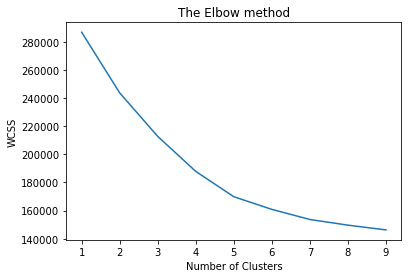

In [361]:
wcss=[]

for i in range(1,10):

    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init=10, random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show



In [362]:
# For no cluster = no categories

kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init=10, random_state=2)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=2)

In [363]:
clusters_labels_kmean = kmeans.labels_

dataset_lalels_encoded = dataset_reduced_PCA["Label"].values

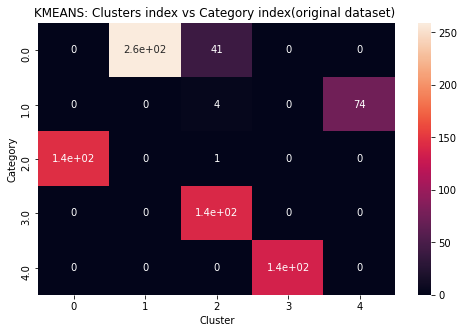

In [364]:
#Confusion matrix

plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(dataset_lalels_encoded, clusters_labels_kmean, rownames=['Category'], 
                               colnames=['Cluster'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_Kmeans.png")
plt.title('KMEANS: Clusters index vs Category index(original dataset) ')
plt.show()

### Evaluation of the clustering with Silhouette


In [365]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 3 The average silhouette_score is : 0.19004333960152686
For n_clusters = 4 The average silhouette_score is : 0.21596535957775714
For n_clusters = 5 The average silhouette_score is : 0.2423219978879119
For n_clusters = 6 The average silhouette_score is : 0.2542373820808574
For n_clusters = 7 The average silhouette_score is : 0.24015561296352186
For n_clusters = 8 The average silhouette_score is : 0.19226728385153985


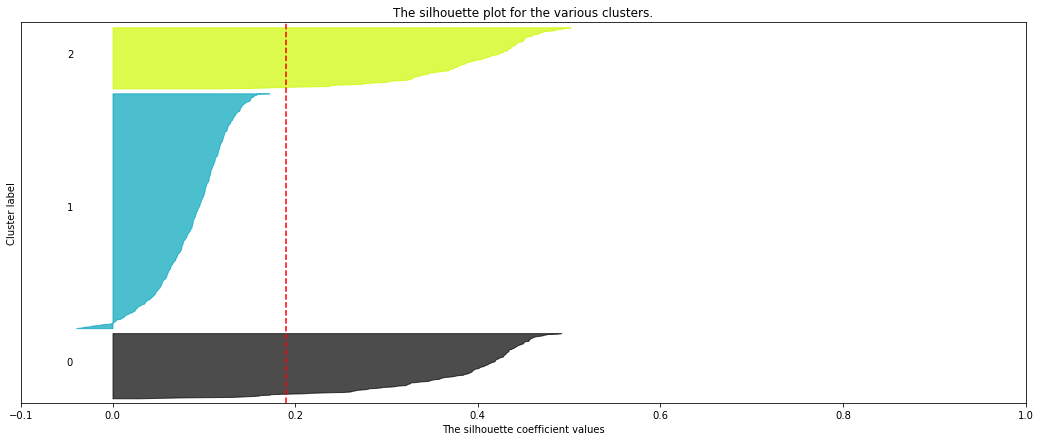

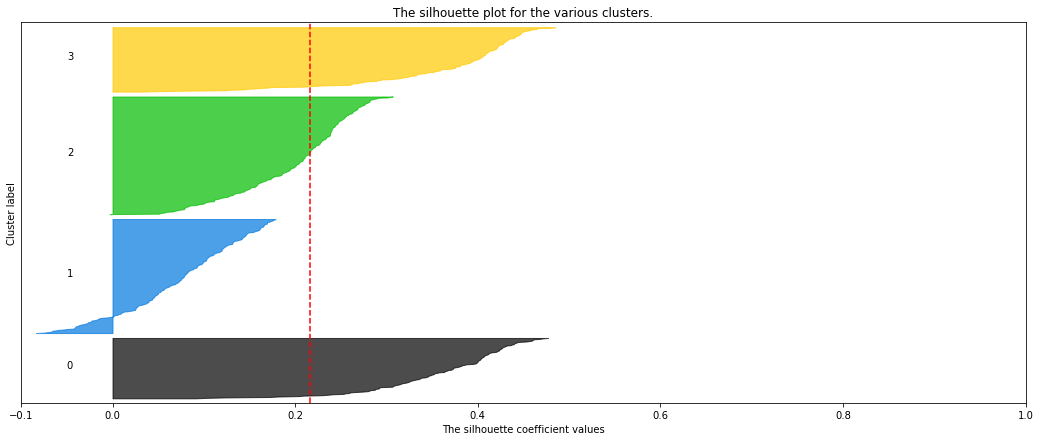

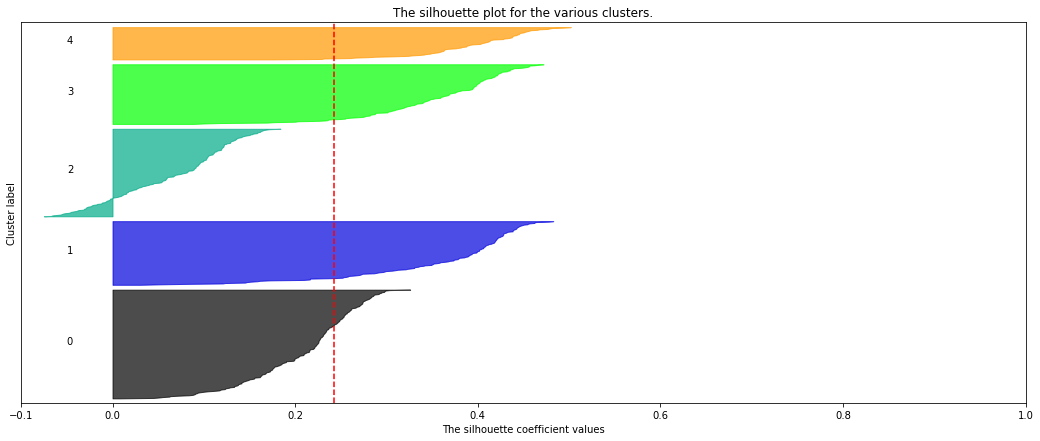

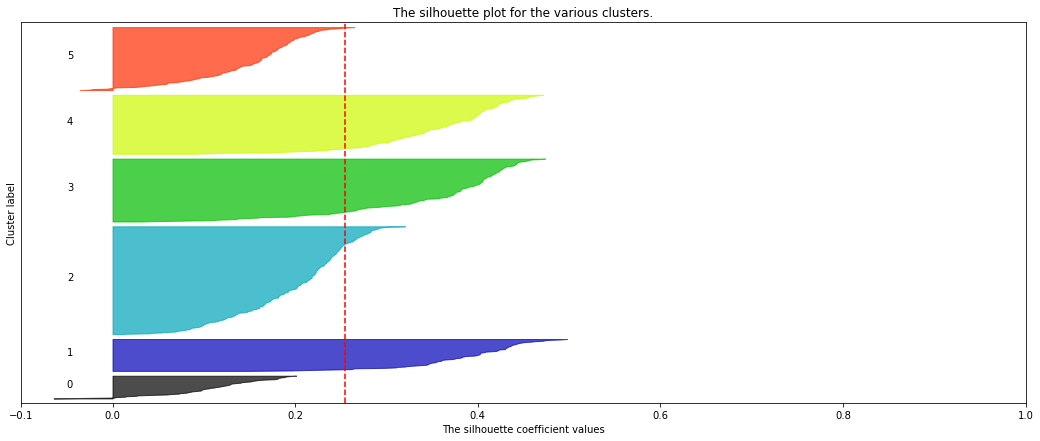

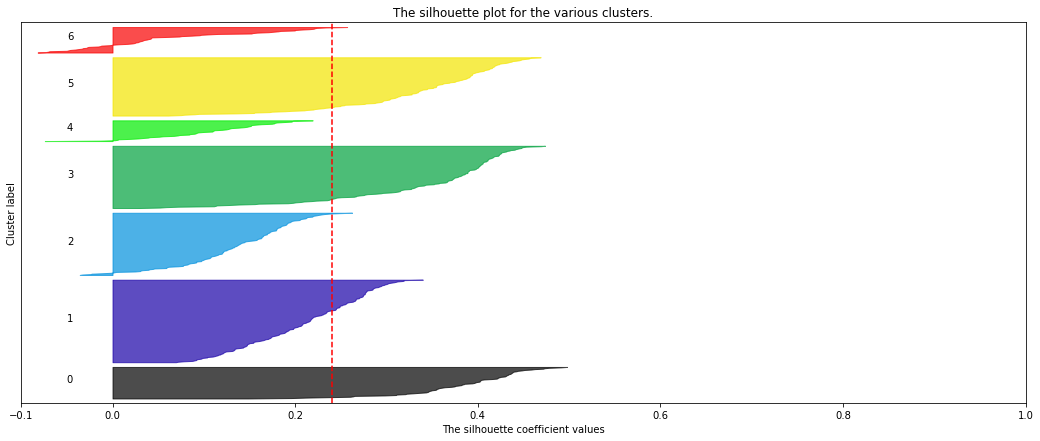

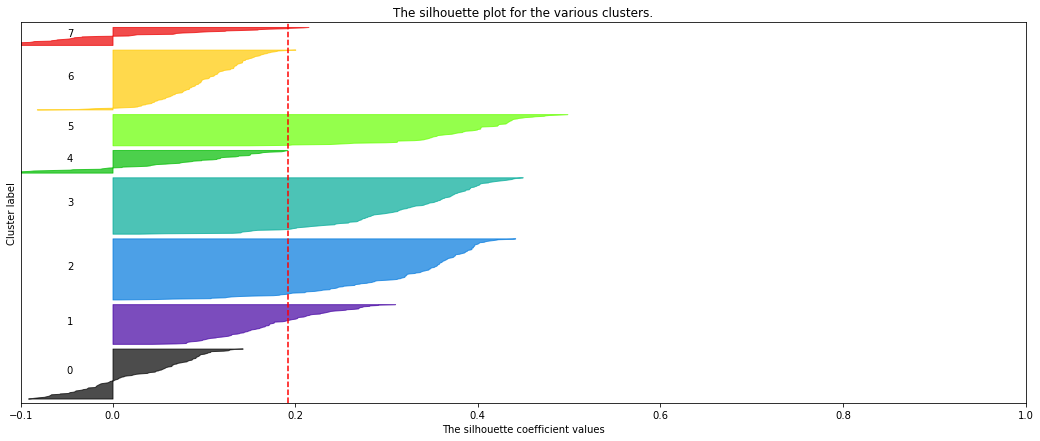

In [366]:
# Silhouete socre for different clusters 

range_n_clusters = [3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)
    
     # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
     # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_2 = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels_2)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels_2)
    
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels_2 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        
plt.show()